In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [2]:
outcomes = make_array('heads', 'tails')

In [3]:
np.random.choice(outcomes)

'tails'

In [4]:
np.random.choice(outcomes, 10)

array(['heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'heads',
       'tails', 'tails', 'tails'],
      dtype='<U5')

In [5]:
np.random.choice(outcomes, 10) == 'heads'

array([ True, False, False, False,  True,  True, False,  True, False,  True], dtype=bool)

In [6]:
sum(np.random.choice(outcomes, 10) == 'heads')

5

In [7]:
sum(np.random.choice(outcomes, 10) == 'tails')

6

In [8]:
flips = np.random.choice(outcomes, 10)

In [9]:
sum(flips == 'heads')

4

In [10]:
sum(flips == 'tails')

6

In [11]:
def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [12]:
results = make_array()

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([ 43.,  50.,  48., ...,  54.,  51.,  50.])

In [13]:
heads = Table().with_columns('Heads', results)
heads

Heads
43
50
48
52
47
50
51
51
39
40


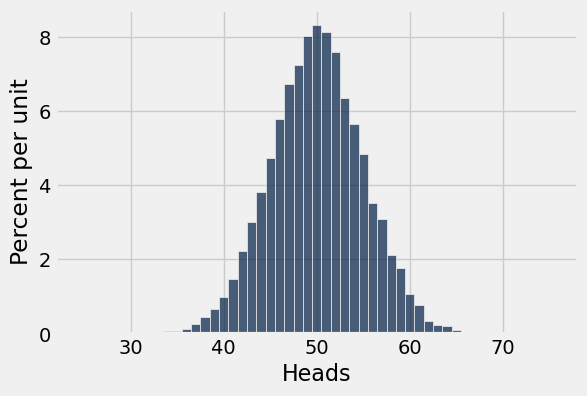

In [14]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Monty Hall

In [15]:
doors = make_array('car', 'first goat', 'second goat')

In [16]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [17]:
other_goat('first goat')

'second goat'

In [18]:
other_goat('wheeler hall')

In [19]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [20]:
monty_hall()

['first goat', 'second goat', 'car']

In [21]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [22]:
games.append(monty_hall())

Guess,Revealed,Remaining
first goat,second goat,car


In [23]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
car,second goat,first goat
car,first goat,second goat
car,second goat,first goat
first goat,second goat,car
car,first goat,second goat
second goat,first goat,car
car,first goat,second goat
car,first goat,second goat
second goat,first goat,car
second goat,first goat,car


In [24]:
games.group('Remaining')

Remaining,count
car,1975
first goat,529
second goat,496


In [25]:
games.group('Guess')

Guess,count
car,1025
first goat,979
second goat,996


In [33]:
2/100 * 1/99

0.00020202020202020202

In [35]:
(1/100 * 1/99 ) + (1/100 * 1/99)

0.00020202020202020202

In [36]:
98/100*97/99

0.9602020202020203